In [45]:
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
import pandas as pd
import seaborn as sns

In [28]:
data_old = np.load('train.npy')
data_old.shape


(8, 8, 12220)

In [29]:
data_new = np.load("train_new.npy")
data_new.shape

(8, 8, 12220)

In [30]:
data_old

array([[[-1.02547480e+00, -1.01867676e+00, -9.90642342e-01, ...,
         -1.01562353e+00, -1.02817619e+00, -1.00278518e+00],
        [-9.74673983e-01, -9.78321573e-01, -9.74234960e-01, ...,
         -2.69007628e-04,  6.28844964e-03,  2.95045098e-03],
        [-1.00550931e+00, -1.00269290e+00, -1.00568616e+00, ...,
          5.21056761e-03,  9.76609461e-03, -1.70789148e-01],
        ...,
        [-9.75588495e-01, -9.87673201e-01, -1.30220510e+00, ...,
         -8.00990304e-03,  3.12433990e-03, -6.57816654e-03],
        [-9.90781576e-01, -9.95390259e-01, -9.86025337e-01, ...,
         -2.49284512e-02, -4.01528804e-02,  9.84914992e-03],
        [-1.00214040e+00, -1.00397939e+00, -9.70682312e-01, ...,
         -1.00560045e+00, -9.99962962e-01, -1.00177486e+00]],

       [[-9.96746562e-01, -9.95900236e-01, -9.98031970e-01, ...,
         -9.81180301e-01, -9.99825985e-01, -9.78941131e-01],
        [-1.01360381e+00, -1.01649598e+00, -9.65679727e-01, ...,
          6.03457005e-02, -3.91607103e

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

def confusion_matrix(data):

    def plot_frame(frame):
        fig, ax = plt.subplots()
        im = ax.imshow(data_old[:, :, frame], cmap='viridis', interpolation='nearest', extent=[0.5, 8.5, 8.5, 0.5])
        plt.title(f"Frame {frame + 1}")
        plt.colorbar(im)
        
        for i in range(8):
            for j in range(8):
                value = data_old[i, j, frame]
                plt.text(j + 1, i + 1, f'{value:.2f}', color='white', ha='center', va='center', fontsize=8)

        plt.xticks(range(1, 9), ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'])
        plt.yticks(range(1, 9))
        plt.show()

    # Create an interactive scroller
    interact(plot_frame, frame=(0, data_old.shape[2] - 1, 1))


In [32]:
confusion_matrix(data_old)

interactive(children=(IntSlider(value=6109, description='frame', max=12219), Output()), _dom_classes=('widget-…

#### Time series
Following code function takes the square index as parameter and plots the value over time for this square

In [38]:
def plot_time_series(spatial_index, data):
    time_series = data[spatial_index[0], spatial_index[1], :]
    
    plt.plot(range(1, data.shape[2] + 1), time_series, label=f'Spatial Index {spatial_index}')
    plt.xlabel('Sample Index')
    plt.ylabel('Value')
    plt.title(f'Time Series for Spatial Index {spatial_index}')
    plt.legend()
    plt.show()

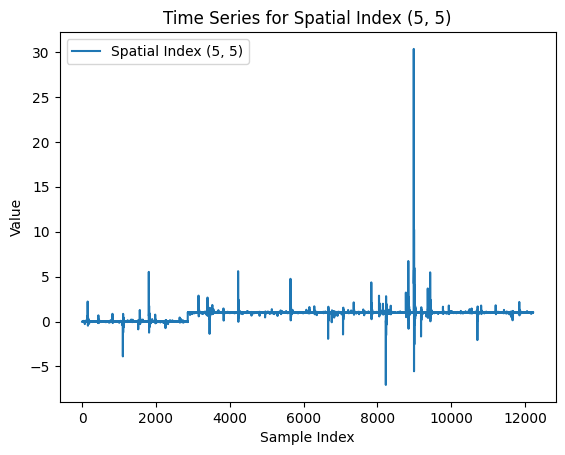

In [40]:

plot_time_series((5, 5), data_old)